In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Giới thiệu về data

In [177]:
summary_statistics = df.describe()
print("Thông tin thống kê của các biến số:")
print(summary_statistics)

Thông tin thống kê của các biến số:
         survived      pclass           age         sibsp         parch  \
count  778.000000  778.000000  7.780000e+02  7.780000e+02  7.780000e+02   
mean     0.411311    2.249357  2.739882e-17  2.739882e-17  1.484103e-17   
std      0.492388    0.853206  1.000643e+00  1.000643e+00  1.000643e+00   
min      0.000000    1.000000 -2.145923e+00 -5.332199e-01 -4.995466e-01   
25%      0.000000    1.000000 -6.216754e-01 -5.332199e-01 -4.995466e-01   
50%      0.000000    3.000000 -3.406212e-03 -5.332199e-01 -4.995466e-01   
75%      1.000000    3.000000  4.576646e-01  4.785974e-01  6.926229e-01   
max      1.000000    3.000000  3.677391e+00  7.561318e+00  6.653471e+00   

               fare       alone    FamilySize  
count  7.780000e+02  778.000000  7.780000e+02  
mean  -6.963867e-17    0.565553  2.283235e-17  
std    1.000643e+00    0.496003  1.662498e+00  
min   -6.644052e-01    0.000000 -1.032767e+00  
25%   -5.103285e-01    0.000000 -1.032767e+00  


In [178]:
# Kích thước
data_shape = df.shape
print("Kích thước của bộ dữ liệu (số hàng, số cột):")
print(data_shape)

Kích thước của bộ dữ liệu (số hàng, số cột):
(778, 14)


In [179]:
# Kiểm tra kiểu dữ liệu của các cột
data_types = df.dtypes
print("Kiểu dữ liệu của các biến:")
print(data_types)


Kiểu dữ liệu của các biến:
survived         int64
pclass           int64
age            float64
sibsp          float64
parch          float64
fare           float64
alone            int64
sex_male          bool
embarked_Q        bool
embarked_S        bool
alone_desc      object
sex_desc        object
AgeGroup      category
FamilySize     float64
dtype: object


In [180]:
# Thống kê mô tả
df.describe()

,survived,pclass,age,sibsp,parch,fare,alone,FamilySize
count,778.000000,778.000000,7.780000e+02,7.780000e+02,7.780000e+02,7.780000e+02,778.000000,7.780000e+02
mean,0.411311,2.249357,2.739882e-17,2.739882e-17,1.484103e-17,-6.963867e-17,0.565553,2.283235e-17
std,0.492388,0.853206,1.000643e+00,1.000643e+00,1.000643e+00,1.000643e+00,0.496003,1.662498e+00
min,0.000000,1.000000,-2.145923e+00,-5.332199e-01,-4.995466e-01,-6.644052e-01,0.000000,-1.032767e+00
25%,0.000000,1.000000,-6.216754e-01,-5.332199e-01,-4.995466e-01,-5.103285e-01,0.000000,-1.032767e+00
50%,0.000000,3.000000,-3.406212e-03,-5.332199e-01,-4.995466e-01,-3.600798e-01,1.000000,-1.032767e+00
75%,1.000000,3.000000,4.576646e-01,4.785974e-01,6.926229e-01,-1.574045e-02,1.000000,1.594030e-01
max,1.000000,3.000000,3.677391e+00,7.561318e+00,6.653471e+00,9.141555e+00,1.000000,9.446111e+00


# Xử lý dữ liệu

In [181]:
#Load dữ liệu

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [182]:
# Xử lý dữ liệu rỗng
df['age'].fillna(df['age'].mean(), inplace=True)

# Bỏ biến định tính rỗng
df.drop('deck', axis=1, inplace=True)

In [183]:
# Loại bỏ dữ liệu trùng lặp
df.drop_duplicates(
    subset=[
        'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
        'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'
    ],
    inplace=True
)

In [184]:
# Loại bỏ dữ liệu ảo, sai
df.dropna(subset=['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
        'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], inplace=True)
# Loại bỏ các giá trị không hợp lệ
df = df[df['age'] >= 0]
df = df[df['fare'] >= 0]

In [185]:
# Scale dữ liệu
from sklearn.preprocessing import StandardScaler
# Lựa chọn các cột số để chuẩn hóa
numeric_features = ['age', 'fare', 'sibsp', 'parch']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Hiển thị dữ liệu sau khi chuẩn hóa
print("\nDữ liệu sau khi chuẩn hóa:")
print(df.head())


Dữ liệu sau khi chuẩn hóa:
   survived  pclass     sex       age     sibsp     parch      fare embarked  \
0         0       3    male -0.566794  0.478597 -0.499547 -0.525640        S   
1         1       1  female  0.604016  0.478597 -0.499547  0.699954        C   
2         1       3  female -0.274091 -0.533220 -0.499547 -0.512721        S   
3         1       1  female  0.384489  0.478597 -0.499547  0.351927        S   
4         0       3    male  0.384489 -0.533220 -0.499547 -0.510328        S   

   class    who  adult_male  embark_town alive  alone  
0  Third    man        True  Southampton    no  False  
1  First  woman       False    Cherbourg   yes  False  
2  Third  woman       False  Southampton   yes   True  
3  First  woman       False  Southampton   yes  False  
4  Third    man        True  Southampton    no   True  


In [186]:
# Xác định các cột cần loại bỏ, chỉ giữ lại những cột có trong DataFrame
columns_to_drop = ['embark_town', 'alive', 'class', 'who', 'adult_male']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Loại bỏ các cột không hữu ích
df.drop(columns=columns_to_drop, inplace=True)
print("\nDữ liệu sau khi chuẩn hóa và loại bỏ các cột không hữu ích:")
print(df.head())


Dữ liệu sau khi chuẩn hóa và loại bỏ các cột không hữu ích:
   survived  pclass     sex       age     sibsp     parch      fare embarked  \
0         0       3    male -0.566794  0.478597 -0.499547 -0.525640        S   
1         1       1  female  0.604016  0.478597 -0.499547  0.699954        C   
2         1       3  female -0.274091 -0.533220 -0.499547 -0.512721        S   
3         1       1  female  0.384489  0.478597 -0.499547  0.351927        S   
4         0       3    male  0.384489 -0.533220 -0.499547 -0.510328        S   

   alone  
0  False  
1  False  
2   True  
3  False  
4   True  


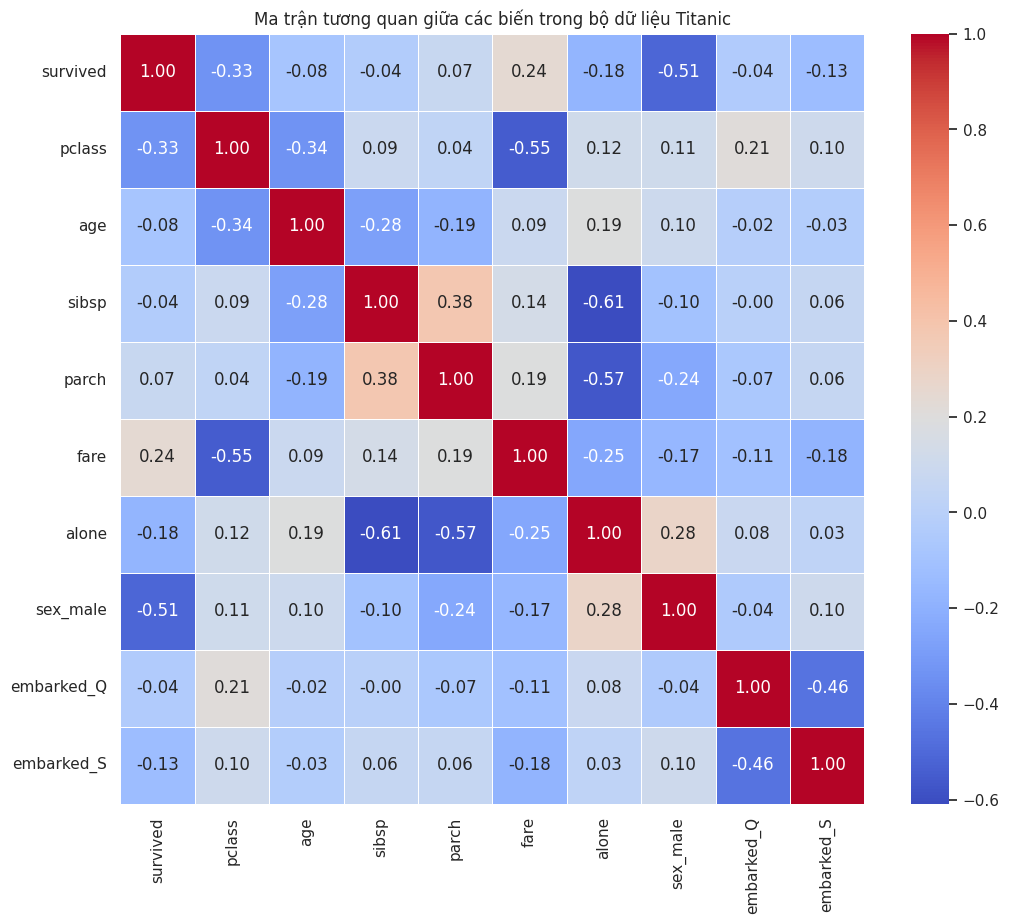

In [187]:
# Chuyển đổi các cột phân loại thành các biến số để tính toán ma trận tương quan
df = pd.get_dummies(df, drop_first=True)

# Tính toán ma trận tương quan
correlation_matrix = df.corr()

# Trực quan hóa ma trận tương quan bằng heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Ma trận tương quan giữa các biến trong bộ dữ liệu Titanic')
plt.show()

# Vẽ


Dữ liệu sau khi chuyển đổi các biến phân loại thành dạng số:
   survived  pclass       age     sibsp     parch      fare  alone  sex_male  \
0         0       3 -0.566794  0.478597 -0.499547 -0.525640      0      True   
1         1       1  0.604016  0.478597 -0.499547  0.699954      0     False   
2         1       3 -0.274091 -0.533220 -0.499547 -0.512721      1     False   
3         1       1  0.384489  0.478597 -0.499547  0.351927      0     False   
4         0       3  0.384489 -0.533220 -0.499547 -0.510328      1      True   

   embarked_Q  embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


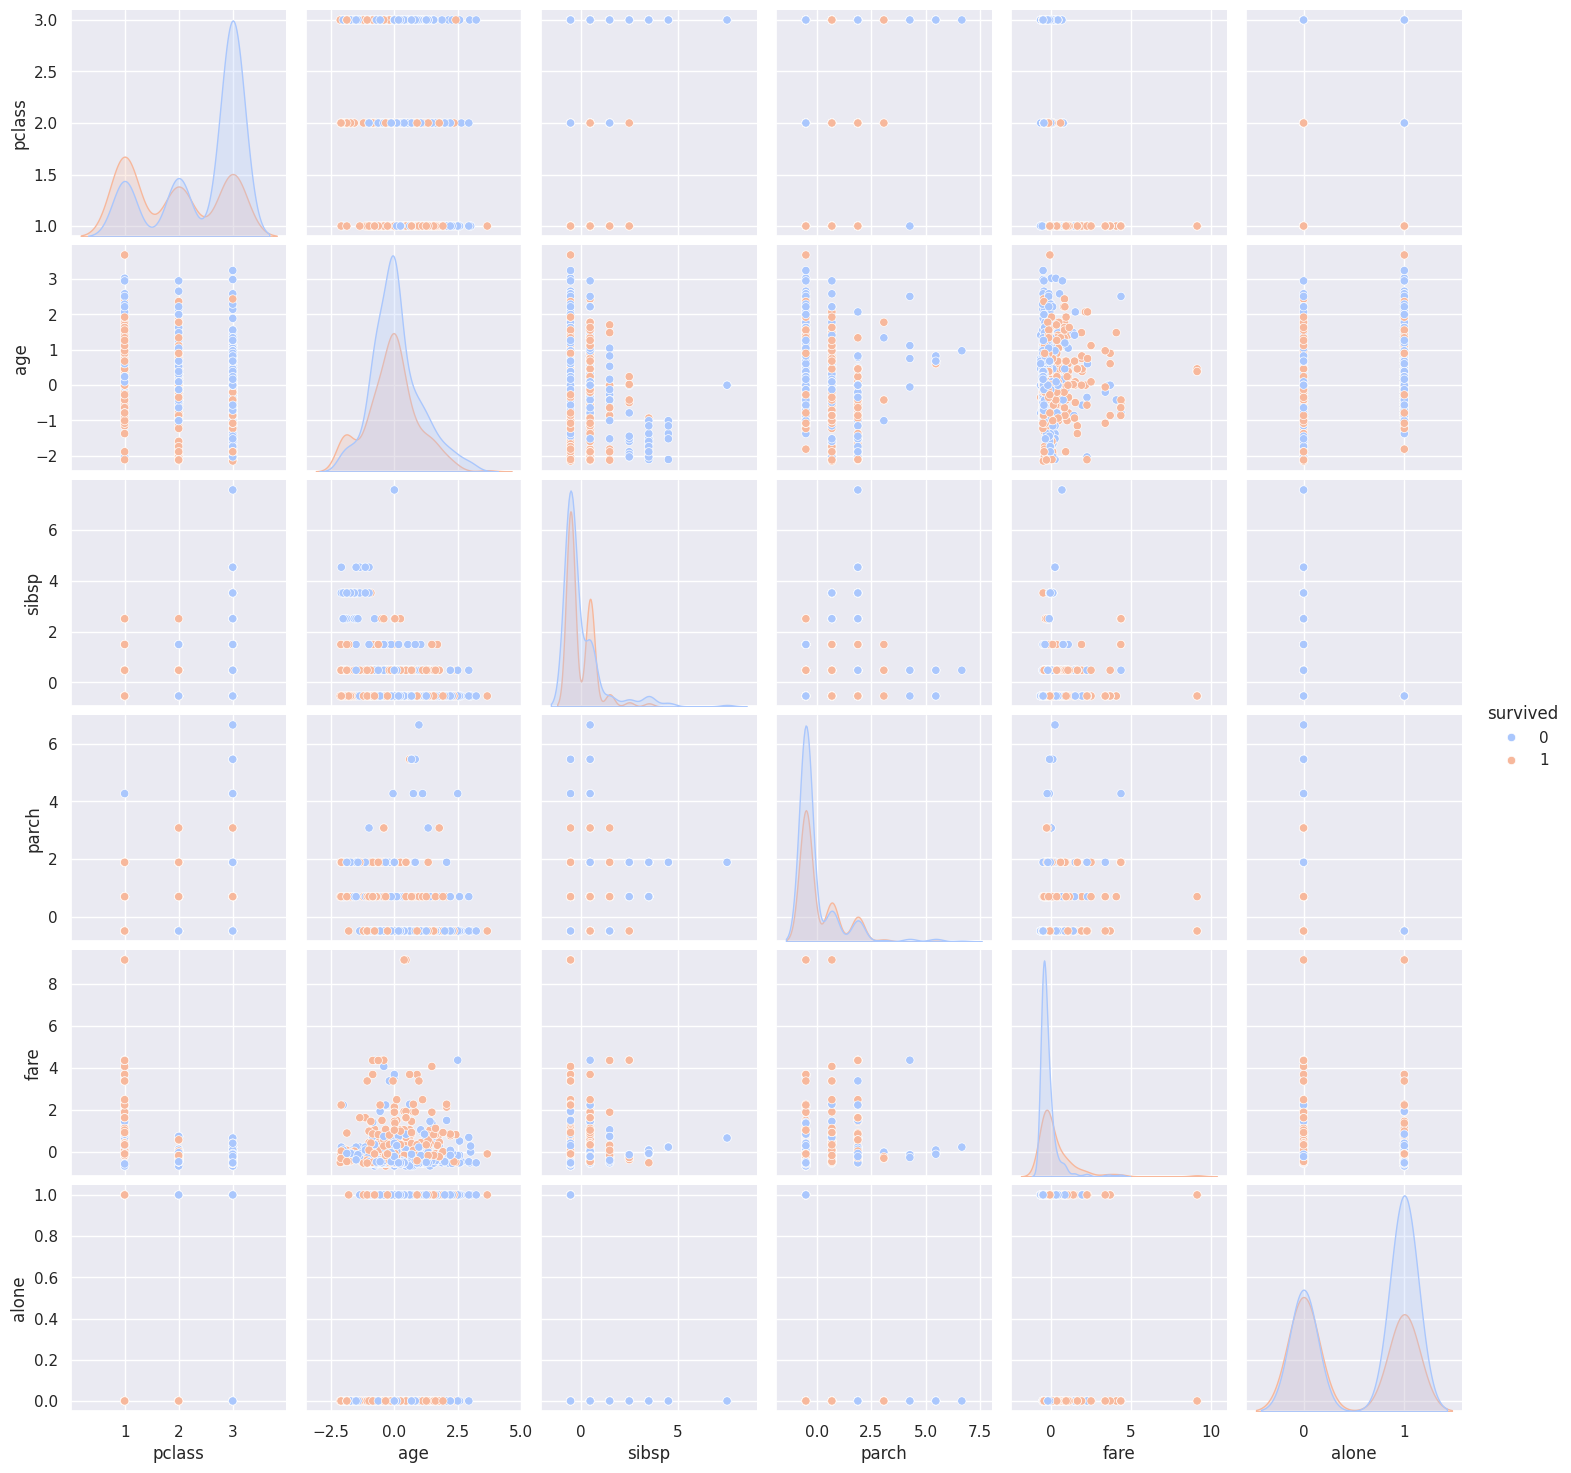

In [188]:
# Chuyển đổi các biến phân loại thành dạng số nếu cần
if 'sex' in df.columns:
    df['sex'] = df['sex'].map({'male': 0, 'female': 1})
if 'embarked' in df.columns:
    df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
if 'deck' in df.columns:
    df['deck'] = df['deck'].map({np.nan: 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})
if 'alone' in df.columns:
    df['alone'] = df['alone'].map({False: 0, True: 1})

# Kiểm tra lại dữ liệu sau khi chuyển đổi
print("\nDữ liệu sau khi chuyển đổi các biến phân loại thành dạng số:")
print(df.head())

# Lấy các cột hiện có trong DataFrame
cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex', 'embarked', 'deck', 'alone']
existing_cols = [col for col in cols if col in df.columns]

# Vẽ pairplot với các cột hiện có
sns.pairplot(df[existing_cols], hue='survived', palette='coolwarm')
plt.show()

In [189]:
# Vẽ biểu đồ histogram cho biến 'age'
fig = px.histogram(df, x='age', title='Phân phối tuổi của hành khách trên tàu Titanic',
                   labels={'age': 'Tuổi', 'count': 'Số lượng hành khách'},
                   color_discrete_sequence=['#FFC0CB'])  # Màu hồng dễ thương
fig.update_layout(bargap=0.05)  # Giảm khoảng cách giữa các cột
fig.show()

In [190]:
# Vẽ biểu đồ histogram cho biến 'survived'
import plotly.express as px
fig = px.histogram(df, x='survived', color='survived', title='Phân phối số lượng người sống sót và không sống sót trên tàu Titanic',
                   labels={'survived': 'Survived (0 = Không, 1 = Có)', 'count': 'Số lượng hành khách'})
fig.update_layout(barmode='stack')
fig.show()
plt.savefig

<function matplotlib.pyplot.savefig(*args, **kwargs)>

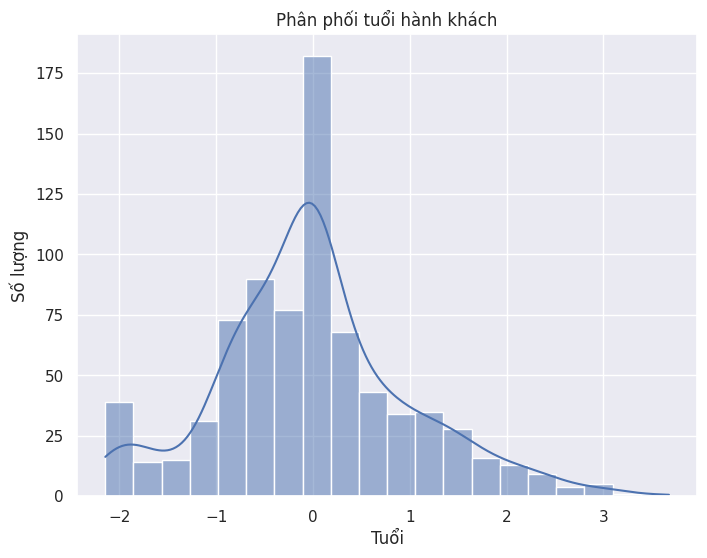

In [191]:
# Plot the distribution of passenger ages
sns.set(style='darkgrid')
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.title('Phân phối tuổi hành khách')
plt.show()

In [192]:
# pclass
fig = px.pie(df, names='pclass', title='Tỉ lệ phân phối các lớp hành khách trên tàu Titanic',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [193]:
# sipsp
fig = px.histogram(df, x='sibsp', title='Phân phối số lượng người có anh/chị/em trên tàu Titanic',
                   labels={'sibsp': 'Số lượng anh/chị/em'},
                   color_discrete_sequence=['#FFC0CB'])
fig.show()


In [194]:
#parch
fig = px.histogram(df, x='parch', title='Phân phối số lượng người có cha mẹ/con cái trên tàu Titanic',
                   labels={'parch': 'Số lượng cha mẹ/con cái'},
                   color_discrete_sequence=px.colors.sequential.Plasma)
fig.show()

In [195]:
#fare
fig = px.histogram(df, x='fare', title='Phân phối giá vé trên tàu Titanic',
                   labels={'fare': 'Giá vé'},
                   color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_traces(opacity=0.75)  # Đặt độ mờ cho biểu đồ
fig.update_layout(bargap=0.05)  # Giảm khoảng cách giữa các cột
fig.show()

In [196]:
#alone
# Thêm cột mô tả 'alone' bằng chuỗi dễ hiểu
df['alone_desc'] = df['alone'].map({1: 'Đi một mình', 0: 'Có người đi cùng'})

# Tạo biểu đồ tròn với Plotly
fig = px.pie(df, names='alone_desc', title='Phân phối hành khách đi một mình và có người đi cùng trên tàu Titanic',
             color='alone_desc', color_discrete_map={'Đi một mình': '#63B7B7', 'Có người đi cùng': '#FFC0CB'})
fig.show()

In [197]:
# Thêm cột mô tả 'sex_male' bằng chuỗi dễ hiểu
df['sex_desc'] = df['sex_male'].map({True: 'Nam', False: 'Nữ'})

# Tạo biểu đồ tròn với Plotly
fig = px.pie(df, names='sex_desc', title='Phân phối giới tính hành khách trên tàu Titanic',
             color='sex_desc', color_discrete_map={'Nam': '#1B7931', 'Nữ': '#FFC0CB'})
fig.show()

In [198]:
# Hiển thị danh sách các cột trong DataFrame
print("Các cột trong DataFrame:")
print(df.columns)

Các cột trong DataFrame:
Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'alone',
       'sex_male', 'embarked_Q', 'embarked_S', 'alone_desc', 'sex_desc'],
      dtype='object')


In [199]:
# Tính tỉ lệ phần trăm của mỗi cảng đón khách
embarked_Q_percent = (df['embarked_Q'].sum() / len(df)) * 100
embarked_S_percent = (df['embarked_S'].sum() / len(df)) * 100
cherbourg_percent = 100 - (embarked_Q_percent + embarked_S_percent)

# Tạo DataFrame mới từ tỉ lệ phần trăm
data = pd.DataFrame({'Cảng đón khách': ['Queenstown', 'Southampton', 'Cherbourg'],
                     'Phần trăm': [embarked_Q_percent, embarked_S_percent, cherbourg_percent]})

# Tạo biểu đồ tròn với Plotly
fig = px.pie(data, names='Cảng đón khách', values='Phần trăm', title='Phân phối cảng đón khách trên tàu Titanic',
             color='Cảng đón khách', color_discrete_map={'Queenstown': '#74C365', 'Southampton': '#FFCC33', 'Cherbourg': '#E24666'})
fig.show()

Vẽ biểu đồ kết hợp

<ipython-input-200-2b74054a2a98>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




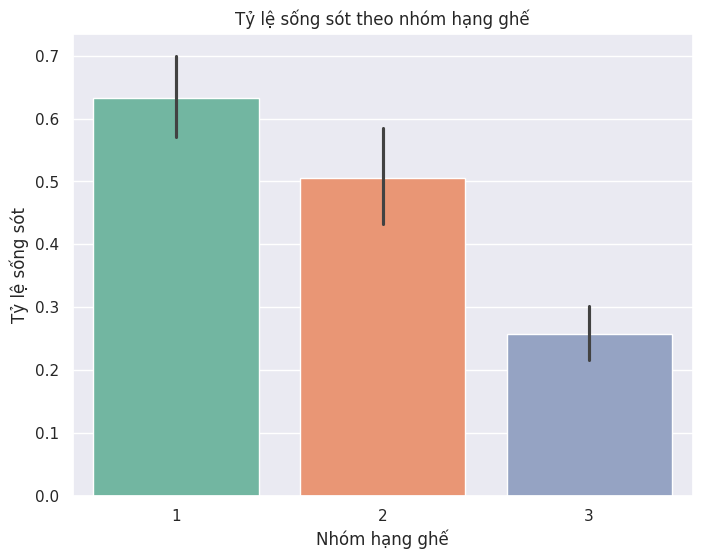

In [200]:
#Survived và Pclass: biểu đồ cột  để so sánh tỷ lệ sống sót giữa các nhóm hạng ghế.
# Vẽ biểu đồ cột so sánh tỷ lệ sống sót giữa các nhóm hạng ghế
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='pclass', y='survived', palette='Set2')
plt.title('Tỷ lệ sống sót theo nhóm hạng ghế')
plt.xlabel('Nhóm hạng ghế')
plt.ylabel('Tỷ lệ sống sót')
plt.show()

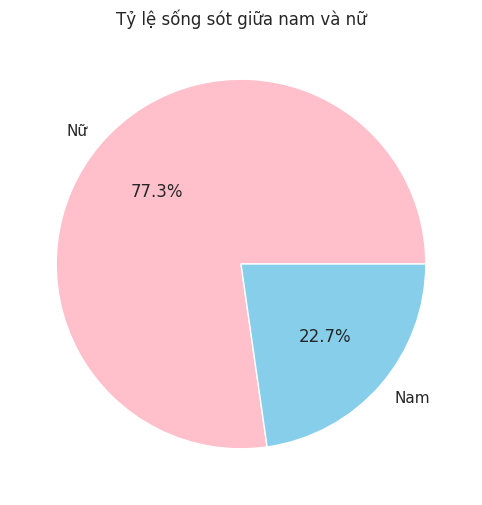

In [206]:
# Tính tỷ lệ sống sót theo giới tính
survived_by_sex = df.groupby('sex_male')['survived'].mean()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(survived_by_sex, labels=['Nữ', 'Nam'], autopct='%1.1f%%', colors=['pink', 'skyblue'])
plt.title('Tỷ lệ sống sót giữa nam và nữ')
plt.show()

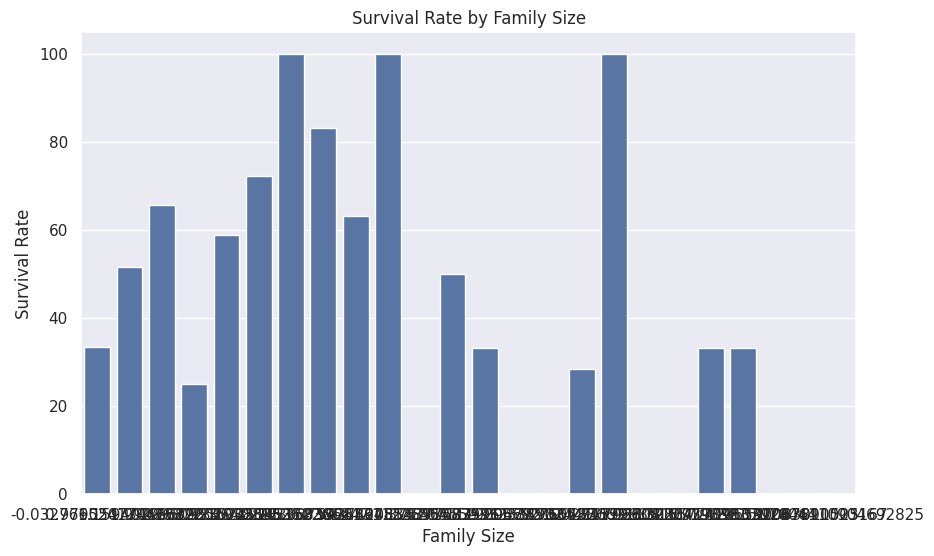

In [202]:
# Tính tổng số thành viên trong gia đình cho mỗi hành khách
df['FamilySize'] = df['sibsp'] + df['parch'] + 1

# Tính tỷ lệ sống sót theo quy mô gia đình
survival_by_family_size = df.groupby('FamilySize')['survived'].mean() * 100

# Tạo biểu đồ cột để trực quan hóa tỷ lệ sống sót theo quy mô gia đình
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_family_size.index, y=survival_by_family_size.values)
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')
plt.show()

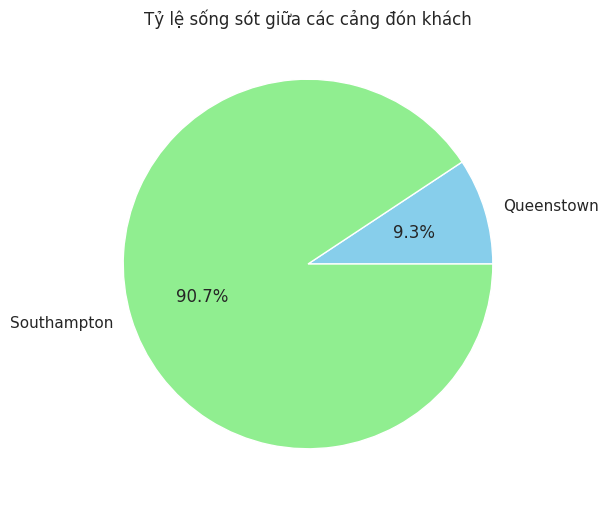

In [210]:
# Tính tỷ lệ sống sót theo từng cảng đón khách
survived_by_embarked = df[['embarked_Q', 'embarked_S']].mean() * 100

# Đổi tên hiển thị trên biểu đồ
survived_by_embarked.rename(index={'embarked_Q': 'Queenstown', 'embarked_S': 'Southampton'}, inplace=True)

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(survived_by_embarked, labels=survived_by_embarked.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Tỷ lệ sống sót giữa các cảng đón khách')
plt.show()